In [1]:
#######################################################
#
# Consumer-Resource model - no production
# Produces eigenvalue plots for circulant and random
# matrices with specialist and generalist subtypes
#
#######################################################

In [2]:
import numpy as np
from numpy.random import normal, uniform
from numpy.linalg import eigvals, norm
import math as mt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"         

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from matplotlib import rcParams
%matplotlib inline

In [3]:
## Circulant Matrix ##

def circ(n, r):

    C_type = 'gaussian2'

    cc = np.array([])
    for i in np.arange(n):

        if C_type == 'gaussian2':
            cc = np.append(cc, (mt.exp(-min(i, abs(n-i))**2 / (2 * r**2))))

    C = cc
    for i in np.arange(n-1):
        cc = np.append(cc[-1:], cc[:-1])
        C  = np.vstack((C, cc))
    return C


In [4]:
## Type of consumption matrix: 'random' or 'circulant' ##

C_type = 'random'


In [5]:
## Parameters ##
  
n   = 20      
eps = 0.25

## Consumption Matrix ##

if C_type == 'random':
    
    D = [1, 6]  # generalist, specialist    
    sig = 1

    gC = abs(normal(0, sig, (n, n))) + D[0] * np.identity(n)
    sC = abs(normal(0, sig, (n, n))) + D[1] * np.identity(n)
        
if C_type == 'circulant':
    
    D = [7, 1]  # generalist, specialist
    
    gC = circ(n, D[0])
    sC = circ(n, D[1])

gC = gC / norm(gC)
sC = sC / norm(sC)

In [6]:
gev = np.array([])
sev = np.array([])

for k in range(5000):
    
    ## Abundances ##

    R = uniform(0, 1, n)
    S = uniform(0, 1, n)
    
    ## Jacobian, L, for Linearized System ##

    gLA = np.diag(-np.dot(gC, S))
    gLB = -np.dot(np.diag(R), gC)
    gLC = eps * np.dot(np.diag(S), np.transpose(gC))
    LD  = np.zeros((n, n))

    gL  = np.vstack((np.hstack((gLA, gLB)), np.hstack((gLC, LD))))
    
    sLA = np.diag(-np.dot(sC, S))
    sLB = -np.dot(np.diag(R), sC)
    sLC = eps * np.dot(np.diag(S), np.transpose(sC))

    sL  = np.vstack((np.hstack((sLA, sLB)), np.hstack((sLC, LD))))

    ## eigenvalues of L ##
    
    gev = np.append(gev, eigvals(gL))
    sev = np.append(sev, eigvals(sL))

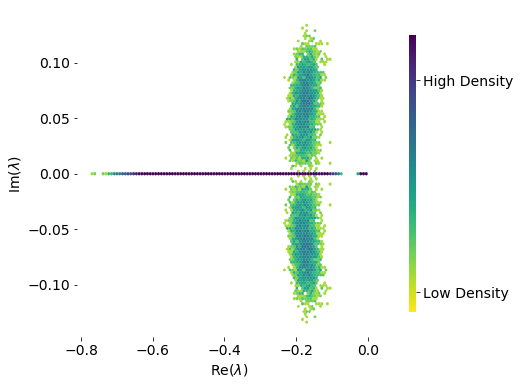

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


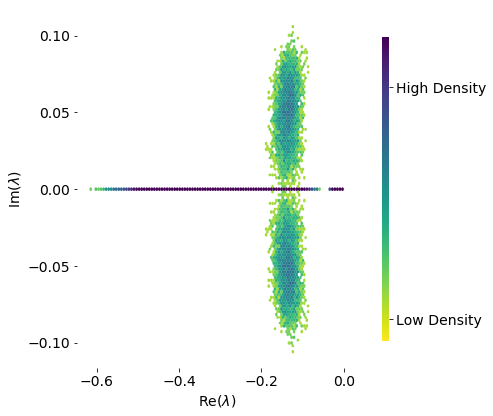

In [7]:
## Plot of eigenvalues ##

for i, ev in enumerate([gev, sev]):

    x = ev.real
    y = ev.imag
    
    font = {'size' : 14}
    plt.rc('font', **font)

    plt.rcParams["axes.edgecolor"] = "white"
    plt.rcParams["axes.linewidth"] = 0
    
    fig, ax = plt.subplots(figsize = (7, 6))

    cmap = plt.cm.viridis_r
    cmap.set_under(color = 'white') 

    plt.hexbin(x, y, bins = 'log', cmap = cmap, linewidths = 0.1)
    plt.xlabel(r'Re($\lambda$)')
    plt.ylabel(r'Im($\lambda$)')
    plt.clim(10**(-8), 2.2)
    
    loc = plticker.MultipleLocator(base = 0.05) 
    ax.yaxis.set_major_locator(loc)
    
    cb = plt.colorbar(aspect = 40, shrink = 0.85, pad = 0.07)
    locs = cb.get_ticks()
    tl = locs[-1] * 2 / 25
    
    cb.set_ticks([tl, locs[-1] - tl])
    cb.set_ticklabels(['Low Density', 'High Density']) 

    rcParams.update({'figure.autolayout': True})
    
plt.show();

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


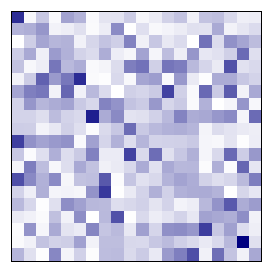

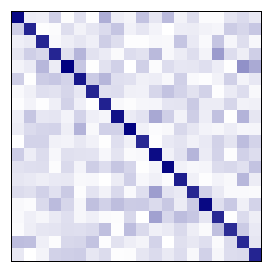

In [8]:
## Plot grid representing consumption matrix C ##

c_map = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',
                                                    ['white', 'navy'],
                                                    256)
for i, C in enumerate([gC, sC]):

    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1

    fig, ax = plt.subplots()

    img = plt.imshow(C, interpolation = 'nearest',
                     cmap = c_map)

    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    
    plt.tick_params(axis = 'both',         
                    which = 'both',      
                    bottom = 'off',      
                    top = 'off',         
                    labelbottom = 'off',
                    left = 'off',
                    right = 'off')

    ax.grid(False)
